### 1. Extarct all email addresses and phone numbers

In [5]:
import re
import nltk

text = "Contact us at support@nlp.com, info@test.org, and john_doe123@gmail.com. please do not email admin@ivalid-site for queries. you can reach us at 8667709578 or (555) 987-6543."

email_pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
emails = re.findall(email_pattern, text)

phone_pattern = r'\(?\b\d{3}[-.)]?\s?\d{3}[-.]?\d{4}\b'
phones = re.findall(phone_pattern, text)

print("Extracted Emails:", emails)
print("Extracted Phone Numbers:", phones)


Extracted Emails: ['support@nlp.com', 'info@test.org', 'john_doe123@gmail.com']
Extracted Phone Numbers: ['8667709578', '(555) 987-6543']


### 2. Extract word with # and *

In [4]:
import re

text = "Excited for the #AI Learning! #MachineLearning *NLP #DeepLEarning *GENAI"

hashtags = re.findall(r'#\w+', text)

asterisks = re.findall(r'\*\w+', text)

print("Hashtags:", hashtags)
print("Asterisks:", asterisks)


Hashtags: ['#AI', '#MachineLearning', '#DeepLEarning']
Asterisks: ['*NLP', '*GENAI']


### 3. In Gutenberg corpus
#### (i) number of words and sentences and highest frequency

In [6]:
import nltk
from nltk.corpus import gutenberg
from collections import Counter

emma_text = gutenberg.words('austen-emma.txt')
emma_sents = gutenberg.sents('austen-emma.txt')

num_words = len(emma_text)

num_sentences = len(emma_sents)

word_freq = Counter(emma_text)
most_common_word = word_freq.most_common(1)

print("Number of words:", num_words)
print("Number of sentences:", num_sentences)
print("Most frequent word:", most_common_word)


Number of words: 192427
Number of sentences: 7752
Most frequent word: [(',', 11454)]


#### (ii) select words starts with B|b



In [7]:
macbeth_text = gutenberg.words('shakespeare-macbeth.txt')

b_words = [word for word in macbeth_text if word.lower().startswith('b')]

print("Words starting with B/b:", b_words[:20])  # Display first 20 words


Words starting with B/b: ['by', 'burley', 'Battaile', 'be', 'bleeding', 'bloody', 'by', 'braue', 'Broyle', 'be', 'but', 'braue', 'brandisht', 'bloody', 'bad', 'Battlements', 'But', 'Began', 'Banquoh', 'bathe']


#### (iii) different types of genres 


In [8]:
from nltk.corpus import brown

genres = brown.categories()

genre_fields = {genre: brown.words(categories=genre)[:10] for genre in genres}

print("Genres and example words:")
for genre, words in genre_fields.items():
    print(f"{genre}: {words}")


Genres and example words:
adventure: ['Dan', 'Morgan', 'told', 'himself', 'he', 'would', 'forget', 'Ann', 'Turner', '.']
belles_lettres: ['Northern', 'liberals', 'are', 'the', 'chief', 'supporters', 'of', 'civil', 'rights', 'and']
editorial: ['Assembly', 'session', 'brought', 'much', 'good', 'The', 'General', 'Assembly', ',', 'which']
fiction: ['Thirty-three', 'Scotty', 'did', 'not', 'go', 'back', 'to', 'school', '.', 'His']
government: ['The', 'Office', 'of', 'Business', 'Economics', '(', 'OBE', ')', 'of', 'the']
hobbies: ['Too', 'often', 'a', 'beginning', 'bodybuilder', 'has', 'to', 'do', 'his', 'training']
humor: ['It', 'was', 'among', 'these', 'that', 'Hinkle', 'identified', 'a', 'photograph', 'of']
learned: ['1', '.', 'Introduction', 'It', 'has', 'recently', 'become', 'practical', 'to', 'use']
lore: ['In', 'American', 'romance', ',', 'almost', 'nothing', 'rates', 'higher', 'than', 'what']
mystery: ['There', 'were', 'thirty-eight', 'patients', 'on', 'the', 'bus', 'the', 'morning', 

### 4. Cosine Similarity for doc1 and doc2


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

doc1 = "I love playing football"
doc2 = "Football is a great sport"

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([doc1, doc2])

similarity = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])

print("Cosine Similarity:", similarity[0][0])


Cosine Similarity: 0.17077611319011649


### 5. Reuters
#### (i) available categories and 50 words of a file

In [10]:
import nltk
from nltk.corpus import reuters
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

categories = reuters.categories()

file_id = reuters.fileids()[0]  

first_50_words = reuters.words(file_id)[:50]

print("Available Categories:", categories[:10])  
print("\nFirst 50 Words of File:", first_50_words)



Available Categories: ['acq', 'alum', 'barley', 'bop', 'carcass', 'castor-oil', 'cocoa', 'coconut', 'coconut-oil', 'coffee']

First 50 Words of File: ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'U', '.', 'S', '.', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia', "'", 's', 'exporting', 'nations', 'that', 'the', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'and', 'officials', 'said', '.', 'They']


#### (ii) Word cloud based on frequency of words across all files

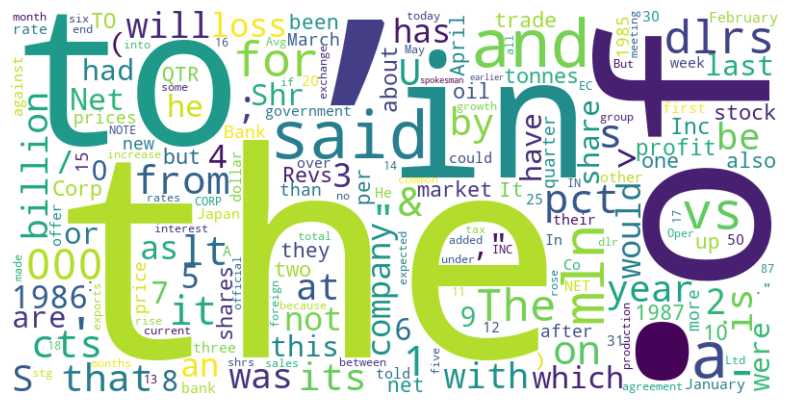

In [11]:
from wordcloud import WordCloud

all_words = reuters.words()
word_freq = Counter(all_words)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


#### (iii) Removed stop words and printing cleaned text

In [12]:
import nltk
from nltk.corpus import reuters, stopwords

stop_words = set(stopwords.words('english'))

file_id = reuters.fileids()[0]

original_words = reuters.words(file_id)

removed_stopwords = [word for word in original_words if word.lower() in stop_words]

filtered_words = [word for word in original_words if word.lower() not in stop_words]

print("\nStopwords Removed (First 50):", removed_stopwords[:50])

print("\nCleaned Text (First 50 Words):", filtered_words[:50])



Stopwords Removed (First 50): ['FROM', 'S', 'between', 'the', 'S', 'And', 'has', 'of', 's', 'that', 'the', 'and', 'They', 'in', 'a', 'S', 'against', 'in', 'the', 'S', 'And', 'to', 'on', 'of', 'their', 'But', 'some', 'that', 'while', 'the', 'them', 'in', 'the', 'in', 'the', 's', 'be', 'their', 'The', 'S', 'Has', 'it', 'will', 'of', 'on', 'of', 'on', 'in', 'for', 's']

Cleaned Text (First 50 Words): ['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'U', '.', '.-', 'JAPAN', 'RIFT', 'Mounting', 'trade', 'friction', 'U', '.', '.', 'Japan', 'raised', 'fears', 'among', 'many', 'Asia', "'", 'exporting', 'nations', 'row', 'could', 'inflict', 'far', '-', 'reaching', 'economic', 'damage', ',', 'businessmen', 'officials', 'said', '.', 'told', 'Reuter', 'correspondents', 'Asian', 'capitals', 'U', '.', '.', 'Move', 'Japan', 'might', 'boost', 'protectionist']


### 6. Chatbot to recognize user's intent to request refund and respond accordingly

In [ ]:
import re

def chatbot_response(user_input):
    refund_pattern = r"refund.*?(\d+(\.\d{1,2})?)"
    
    match = re.search(refund_pattern, user_input, re.IGNORECASE)
    
    if match:
        refund_amount = match.group(1)
        return f"*/ I WILL PROCESS A REFUND OF {refund_amount} /1\\"
    
    elif "refund" in user_input.lower():
        return "*/CAN YOU PROVIDE DETAILS ABOUT THE REFUND REQUEST?/1\\"
    
    return "*/I'M SORRY, I CAN ONLY HELP WITH REFUND REQUESTS./1\\"

print("ELIZA: Hello! I can help with refund requests. Type 'exit' to quit.")
while True:
    user_input = input("User: ")
    if user_input.lower() == "exit":
        print("ELIZA: Goodbye!")
        break
    response = chatbot_response(user_input)
    print("ELIZA:", response)


ELIZA: Hello! I can help with refund requests. Type 'exit' to quit.
ELIZA: */ I WILL PROCESS A REFUND OF 99 /1\
